Predict whether the customer will re pay the loan or not ?

These are the features available in dataset:

* `credit.policy`: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.  

* `purpose`: The purpose of the loan (takes values “credit_card”, “debt_consolidation”, “educational”, “major_purchase”, “small_business”, and “all_other”).  

* `int.rate`: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.  

* `installment`: The monthly installments owed by the borrower if the loan is funded.  

* `log.annual.inc`: The natural log of the self-reported annual income of the borrower.  

* `dti`: The debt-to-income ratio of the borrower (amount of debt divided by annual income).  

* `fico`: The FICO credit score of the borrower.  

* `days.with.cr.line`: The number of days the borrower has had a credit line.  

* `revol.bal`: The borrower’s revolving balance (amount unpaid at the end of the credit card billing cycle).  

* `revol.util`: The borrower’s revolving line utilization rate (the amount of the credit line used relative to total credit available).  

* `inq.last.6mths`: The borrower’s number of inquiries by creditors in the last 6 months.  

* `delinq.2yrs`: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.  

* `pub.rec`: The borrower’s number of derogatory public records (bankruptcy filings, tax liens, or judgments).  

* `not.fully.paid`: Target variable.  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

In [14]:
df = pd.DataFrame(pd.read_csv('loan_data.csv'))

In [15]:
df.sample(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9154,0,debt_consolidation,0.1158,330.14,10.714418,21.87,712,2610.00000,9131,24.7,4,0,0,0
7955,0,educational,0.0933,319.54,11.251561,16.29,717,3480.00000,2,0.1,16,0,0,0
6926,1,all_other,0.0774,124.88,11.507913,1.74,757,4380.00000,6642,7.9,0,0,0,0
9513,0,credit_card,0.1253,384.87,11.002100,11.56,722,3614.00000,25088,75.6,5,0,0,1
4335,1,credit_card,0.0774,234.14,10.239960,22.37,782,13049.95833,9800,17.7,0,0,0,0


In [16]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [17]:
 df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

/Users/yanhong/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/yanhong/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/yanhong/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


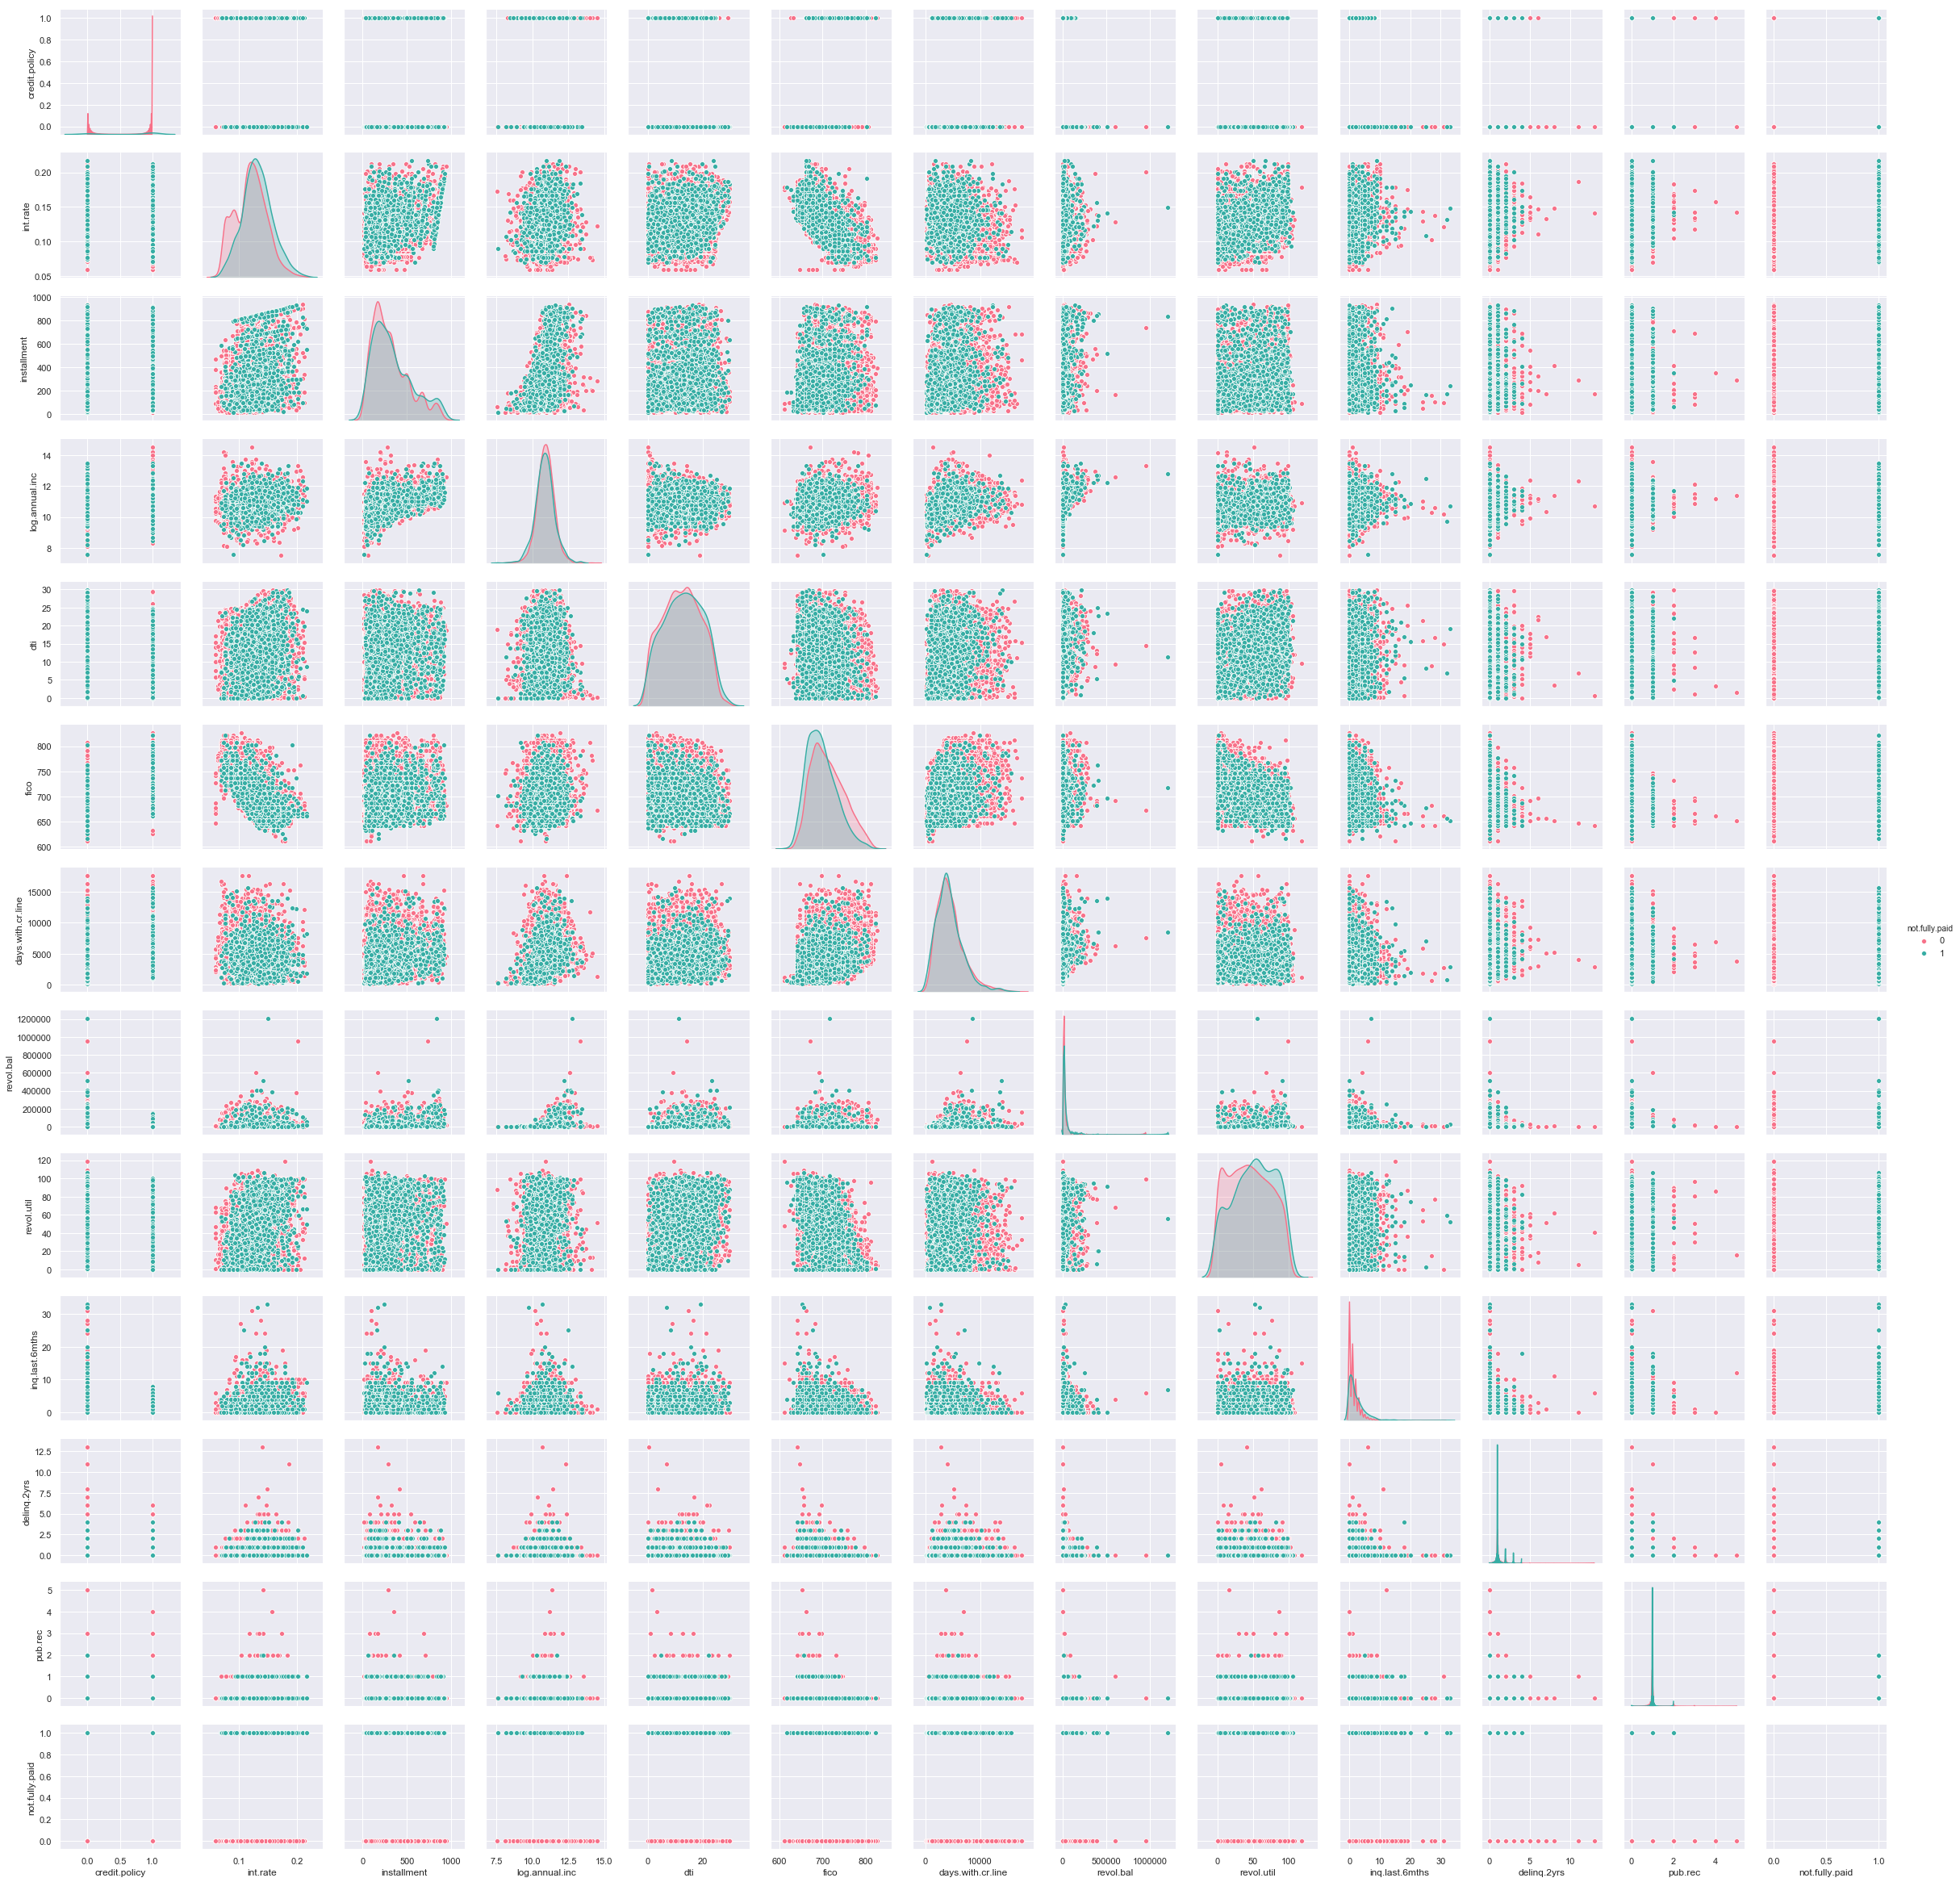

In [6]:
sns.pairplot(df, hue='not.fully.paid', palette='husl')

In [18]:
purpose = pd.get_dummies(df.purpose, prefix='purpose')

In [19]:
df = pd.concat([purpose, df.drop(columns='purpose')], axis=1)

In [20]:
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

In [21]:
X = df.drop(columns=['not.fully.paid'])
y = df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=0.2)

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7662, 19)
(7662,)
(1916, 19)
(1916,)


In [23]:
pipelines = {
    'dt' : make_pipeline(DecisionTreeClassifier(random_state=123)),
    'rf' : make_pipeline(RandomForestClassifier(random_state=123)),
    'xgb': make_pipeline(XGBClassifier(random_state=123))
}

dt_hyperparameters = {'decisiontreeclassifier__min_samples_leaf':[100,200]}
rf_hyperparameters = {'randomforestclassifier__n_estimators':[100,200] }
xgb_hyperparameters= {'xgbclassifier__n_estimators': [100,200] }

hyperparameters = {
    'dt' : dt_hyperparameters,
    'rf' : rf_hyperparameters,
    'xgb': xgb_hyperparameters
}

In [24]:
fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    model.fit(X_train, y_train)
    fitted_models[name] = model
    print(name, 'has been fitted.')

dt has been fitted.
rf has been fitted.
xgb has been fitted.


In [25]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

dt 0.8382928739232577
rf 0.8376403027930044
xgb 0.8372487601148525


In [26]:
for name, model in fitted_models.items():
    print(name, accuracy_score(y_test, model.predict(X_test)))

dt 0.8465553235908142
rf 0.8444676409185804
xgb 0.8465553235908142


Text(0.5, 0, 'Relative Frequency')

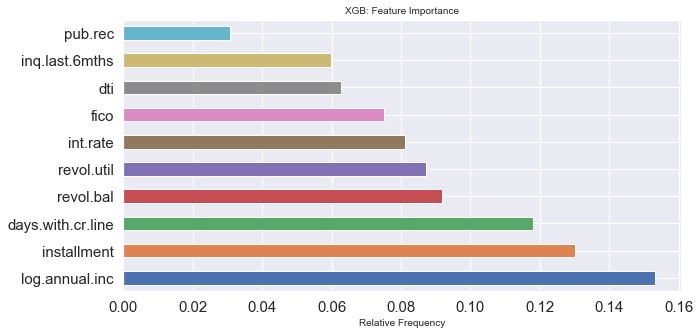

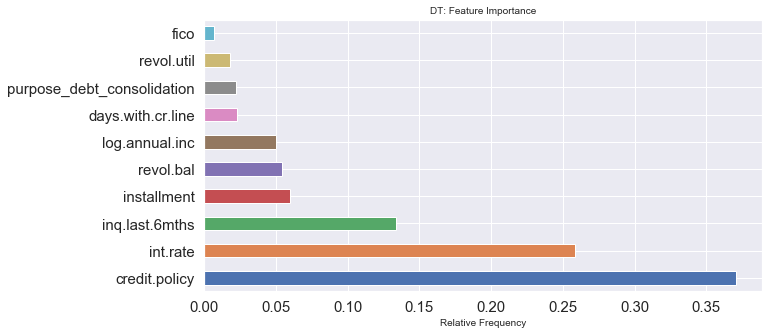

In [27]:
importances = fitted_models['xgb'].best_estimator_.steps[0][1].feature_importances_
features = X_train.columns
plt.figure(figsize=[10,5])
feat_importances = pd.Series(importances, index=features)
feat_importances.nlargest(10).plot(kind='barh', fontsize=15)
plt.title('XGB: Feature Importance', fontsize=10)
plt.xlabel('Relative Frequency', fontsize=10)

importances = fitted_models['dt'].best_estimator_.steps[0][1].feature_importances_
features = X_train.columns
plt.figure(figsize=[10,5])
feat_importances = pd.Series(importances, index=features)
feat_importances.nlargest(10).plot(kind='barh', fontsize=15)
plt.title('DT: Feature Importance', fontsize=10)
plt.xlabel('Relative Frequency', fontsize=10)

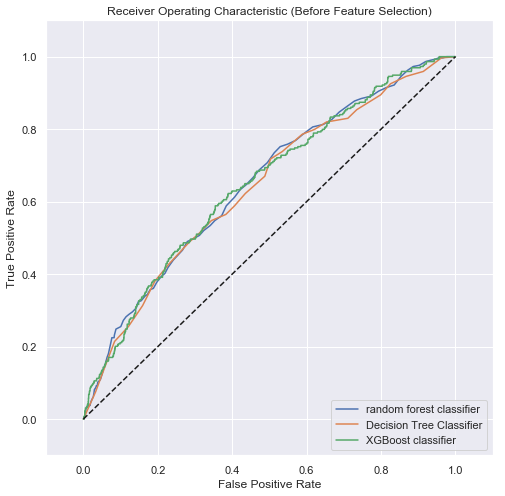

In [28]:
rf_pred = [p[1] for p in fitted_models['rf'].predict_proba(X_test)]
dt_pred = [p[1] for p in fitted_models['dt'].predict_proba(X_test)]
xgb_pred = [p[1] for p in fitted_models['xgb'].predict_proba(X_test)]

rfpr, rtpr, rthresholds = roc_curve(y_test, rf_pred)
dtfpr, dttpr, gthresholds = roc_curve(y_test, dt_pred)
xgbfpr, xgbtpr, xgthresholds = roc_curve(y_test, xgb_pred)

fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic (Before Feature Selection)')

# Plot ROC curve of Random Forest Classifier
plt.plot(rfpr, rtpr, label='random forest classifier')
plt.legend(loc='lower right')

# Plot ROC curve of Decision Tree Classifier
plt.plot(dtfpr, dttpr, label='Decision Tree Classifier')
plt.legend(loc='lower right')

# Plot ROC curve of Grandient Boosting Classifier
plt.plot(xgbfpr, xgbtpr, label='XGBoost classifier')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [29]:
auc = {}
for name, model in fitted_models.items():
    pred = model.predict_proba(X_test)
    pred = [p[1] for p in pred]
    auc.update({name:roc_auc_score(y_test, pred)})

In [30]:
score = [{name: accuracy_score(y_test, model.predict(X_test))} for name, model in fitted_models.items()]

In [31]:
print('The auc of each algo: \n', auc, '\n')
print('The accuracy of each algo: \n',score)

The auc of each algo: 
 {'dt': 0.6401027118615634, 'rf': 0.6504546331479572, 'xgb': 0.6489741395941854} 

The accuracy of each algo: 
 [{'dt': 0.8465553235908142}, {'rf': 0.8444676409185804}, {'xgb': 0.8465553235908142}]
